# Laboratório 2 - Leonardo Gargitter GRR20172145

O objetivo desta atividade é o processo de fixação de conceitos relacionados a modulação AM estudada.
Neste laboratório, você terá alguns recursos para formação de gráficos em python com diferentes tipos de modulação.


## 1) Gerar um sinal AM-DSB.


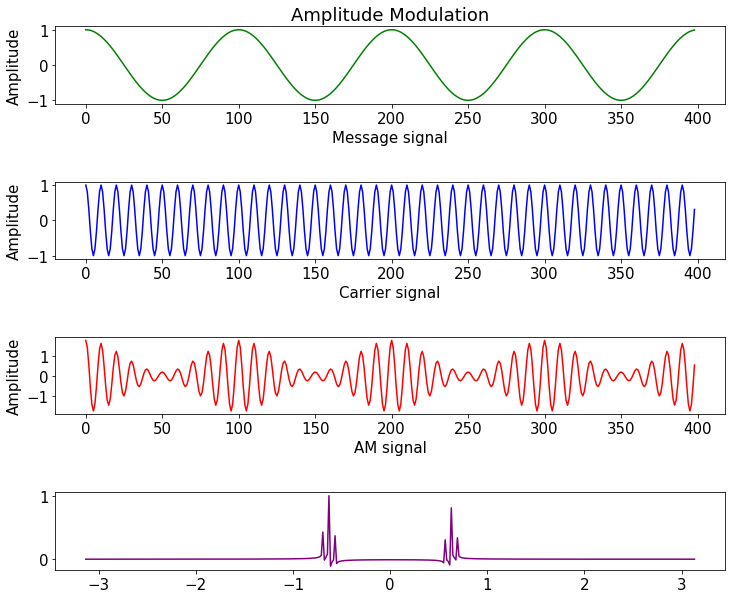

In [324]:
from numpy import *
from matplotlib.pyplot import *
from scipy.fft import *

A_c = 1 #amplitude da portadora
f_c = 500 #frequencia da portadora

f_s = f_c * 10 # frequencia de amostragem
T_s = 1/f_s

A_m = 1 #amplitude do sinal modulante
f_m = 50 # frequencia do sinal modulante
T = 4 / f_m #tempo do sinal gerado

t = arange(0, T - T_s, T_s)

Ka = 0.8

ct = A_c*cos(2*pi*f_c*t)
mt = A_m*cos(2*pi*f_m*t)
st = (1+Ka*mt)*ct

subplot(4,1,1)
title('Amplitude Modulation')
plot(mt,'g')
ylabel('Amplitude')
xlabel('Message signal')

subplot(4,1,2)
plot(ct, 'b')
ylabel('Amplitude')
xlabel('Carrier signal')

subplot(4,1,3)
plot(st, color="r")
ylabel('Amplitude')
xlabel('AM signal')

yf = fftshift(fft(st))
xf = fftshift(fftfreq(len(yf)) * 2 * pi)

subplot(4,1,4)
plot(xf,yf/max(yf), color="purple")

subplots_adjust(hspace=1)
rc('font', size=15)
fig = gcf()
fig.set_size_inches(12, 10)




Na figura acima fica nítido como está ocorrendo a modulação por amplitude, nas próximas células vou criar uma função que plota o sinal modulado no tempo e na amplitude variando os parâmetros desejados.

In [313]:
def am_dsb(A_c,f_c,A_m,f_m,Ka,t):
    ct = A_c*cos(2*pi*f_c*t)
    mt = A_m*cos(2*pi*f_m*t)
    st = (1+Ka*mt)*ct

    subplot(2,1,1)
    plot(st, color="b")
    xlabel('tempo')

    yf = fftshift(fft(st))
    xf = fftshift(fftfreq(len(yf)) * 2 * pi)

    subplot(2,1,2)
    plot(xf,yf/max(yf), color="purple")
    xlabel('frequencia')

    subplots_adjust(hspace=1)
    rc('font', size=15)
    fig = gcf()
    fig.set_size_inches(10,5)



###    a) Alterar a frequência de amostragem;

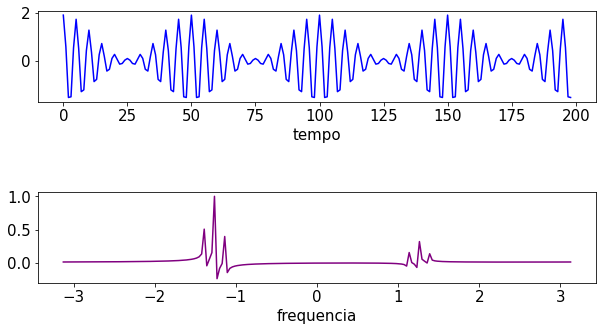

In [325]:
f_s = f_c * 5 # frequencia de amostragem
T_s = 1/f_s

t = arange(0, T - T_s, T_s) 

am_dsb(A_c,f_c,A_m,f_m,modulation_index,t)

Diminuindo a frequência de amostragem a resolução do plot no domínio do tempo ficar pior por ter menos pontos, e no domínio da frequência a leitura dos dados fica imprecisa.

###    b) Alterar a amplitude da portadora;

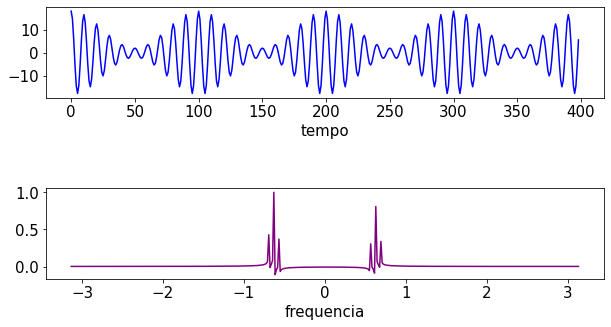

In [326]:
f_s = f_c * 10 # frequencia de amostragem
T_s = 1/f_s

t = arange(0, T - T_s, T_s)

A_c = 10

am_dsb(A_c,f_c,A_m,f_m,Ka,t)

O aumento da amplitude da portadora resultou no aumento da amplitude do sinal modulado no tempo. No domínio da frequencia o sinal está normalizado, mas se não estivesse a amplitude também seria afetada.

### c) Frequência da portadora;

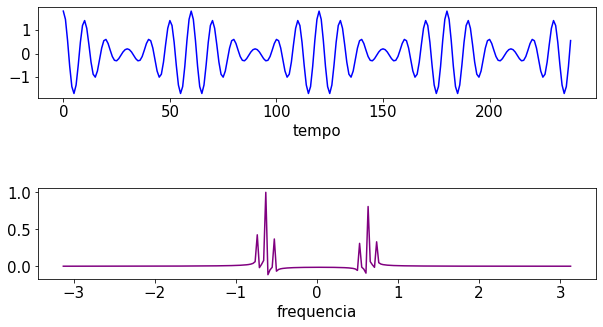

In [327]:
A_c = 1

f_c = 300
f_s = f_c * 10 # frequencia de amostragem
T_s = 1/f_s

t = arange(0, T - T_s, T_s) 

am_dsb(A_c,f_c,A_m,f_m,Ka,t)

Diminuindo a frequência da portadora temos que o sinal modulado é representado com uma frequência menor, aparecendo assim com os ciclos mais espaçados.

###    d) Índice de modulação;

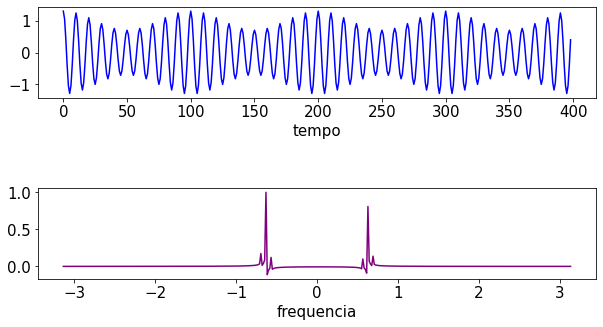

In [317]:
f_c = 500
f_s = f_c * 10 # frequencia de amostragem
T_s = 1/f_s

t = arange(0, T - T_s, T_s) 

Ka = 0.3

am_dsb(A_c,f_c,A_m,f_m,Ka,t)

Alterar o índice de modulação representa mudar a diferença entre os módulos máximos e mínimos das amplitudes, conforme se percebe analisando o sinal no domínio do tempo. No espectro da frequência é perceptível que o sinal da portadora fica mais forte quando reduzimos o índice de modulação.

    
   ### e) Amplitude do sinal modulante;

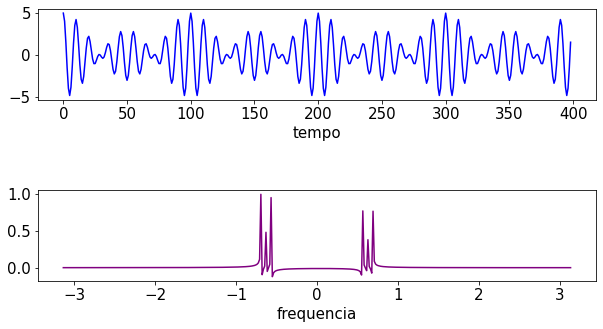

In [318]:
Ka = 0.8

A_m = 5

am_dsb(A_c,f_c,A_m,f_m,Ka,t)

Nesse caso percebe-se que há inversão de fase no domínio do tempo. No espectro de frequência o sinal modulante fica com amplitude superior.

    
   ### f) Frequência do sinal modulante.

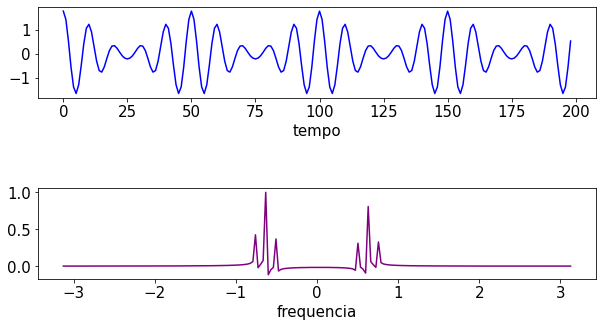

In [319]:
A_m = 1
f_m = 100 # frequencia do sinal modulante
T = 4 / f_m #tempo do sinal gerado

t = arange(0, T - T_s, T_s) 

am_dsb(A_c,f_c,A_m,f_m,Ka,t)

Aqui como a frequência do sinal modulante foi aumentada notamos o mesmo efeito que a redução da frequência da portadora.

## 2) Gerar um sinal AM-DSB-SC.

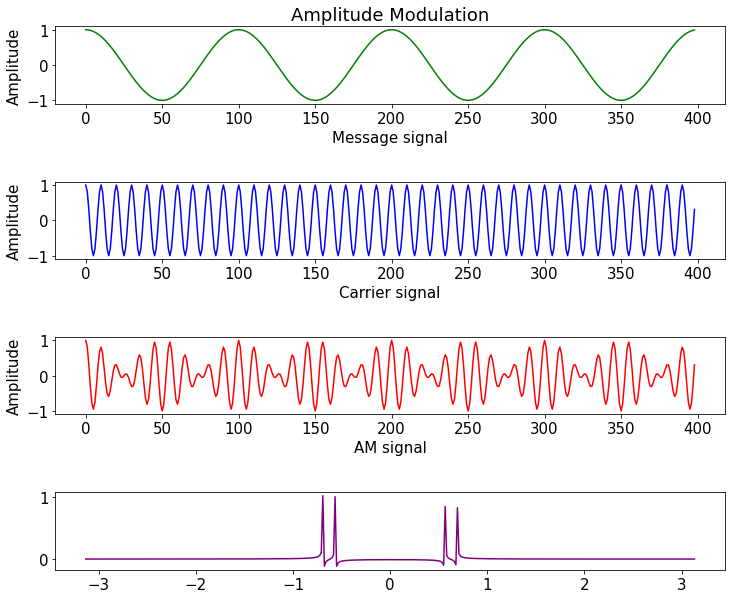

In [328]:
A_c = 1 #amplitude da portadora
f_c = 500 #frequencia da portadora

f_s = f_c * 10 # frequencia de amostragem
T_s = 1/f_s

A_m = 1 #amplitude do sinal modulante
f_m = 50 # frequencia do sinal modulante
T = 4 / f_m #tempo do sinal gerado

t = arange(0, T - T_s, T_s)

ct = A_c*cos(2*pi*f_c*t)
mt = A_m*cos(2*pi*f_m*t)
st = mt*ct

subplot(4,1,1)
title('Amplitude Modulation')
plot(mt,'g')
ylabel('Amplitude')
xlabel('Message signal')

subplot(4,1,2)
plot(ct, 'b')
ylabel('Amplitude')
xlabel('Carrier signal')

subplot(4,1,3)
plot(st, color="r")
ylabel('Amplitude')
xlabel('AM signal')

yf = fftshift(fft(st))
xf = fftshift(fftfreq(len(yf)) * 2 * pi)

subplot(4,1,4)
plot(xf,yf/max(yf), color="purple")

subplots_adjust(hspace=1)
rc('font', size=15)
fig = gcf()
fig.set_size_inches(12, 10)

In [321]:
def am_dsb_sc(A_c,f_c,A_m,f_m,t):
    ct = A_c*cos(2*pi*f_c*t)
    mt = A_m*cos(2*pi*f_m*t)
    st = mt*ct

    subplot(2,1,1)
    plot(st, color="b")
    xlabel('tempo')

    yf = fftshift(fft(st))
    xf = fftshift(fftfreq(len(yf)) * 2 * pi)

    subplot(2,1,2)
    plot(xf,yf/max(yf), color="purple")
    xlabel('frequencia')

    subplots_adjust(hspace=1)
    rc('font', size=15)
    fig = gcf()
    fig.set_size_inches(10,5)

### a) Alterar a frequência de amostragem;

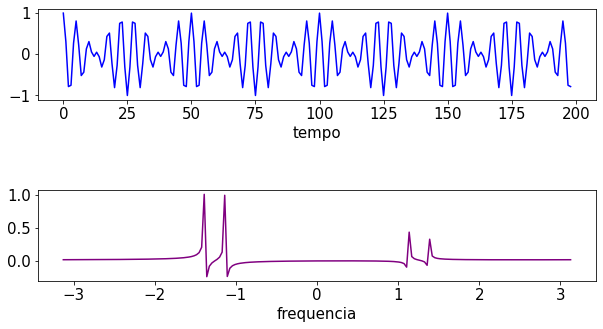

In [330]:
f_s = f_c * 5 # frequencia de amostragem
T_s = 1/f_s

t = arange(0, T - T_s, T_s)

Reduzindo a frequência de amostragem a resolução do gráfico é reduzida e a qualidade da informação principalmente no domínio da frequência também é pior. O efeito é o mesmo que na modulação AM-DSB.

### b) Alterar a amplitude da portadora;

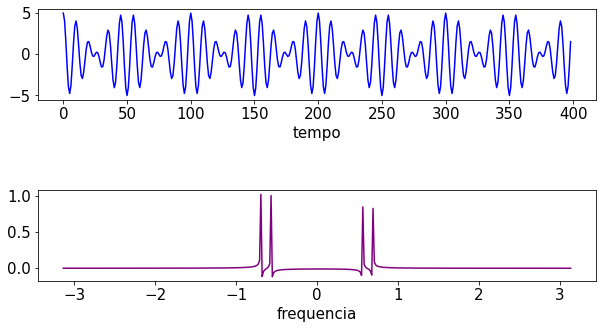

In [331]:
f_s = f_c * 10 # frequencia de amostragem
T_s = 1/f_s

t = arange(0, T - T_s, T_s)

A_c = 5

am_dsb_sc(A_c,f_c,A_m,f_m,t)

Aqui também temos o mesmo efeito que na AM-DSB aumentando a amplitude do sinal modulado.

### c) Frequência da portadora;   

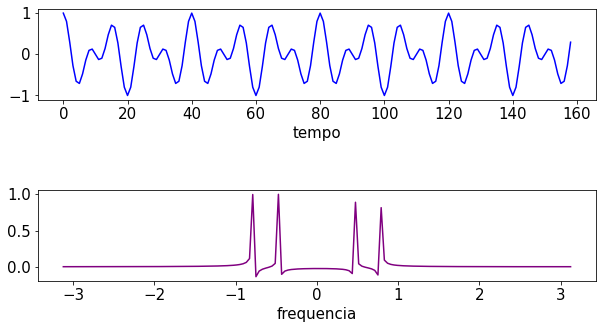

In [334]:
A_c = 1

f_c = 200 #frequencia da portadora

f_s = f_c * 10 # frequencia de amostragem
T_s = 1/f_s

t = arange(0, T - T_s, T_s)

am_dsb_sc(A_c,f_c,A_m,f_m,t)

Percebe-se que reduzindo a frequência da portadora fica cada vez mais difícil distinguir qual é o sinalo sendo transmitido.

### d) Amplitude do sinal modulante;  

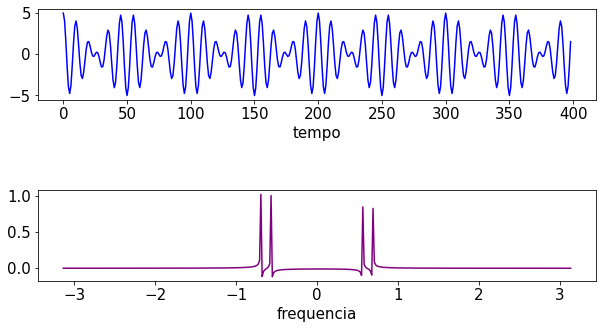

In [335]:
f_c = 500 #frequencia da portadora

f_s = f_c * 10 # frequencia de amostragem
T_s = 1/f_s

t = arange(0, T - T_s, T_s)

A_m = 5

am_dsb_sc(A_c,f_c,A_m,f_m,t)


Diferentemente da modulação AM-DSB o aumento da amplitude do sinal modulante afeta a amplitude do sinal modulado no tempo e consequentemente a amplitude no domínio da frequência. (O sinal do domínio da frequência está normalizado)

### e) Frequência do sinal modulante.

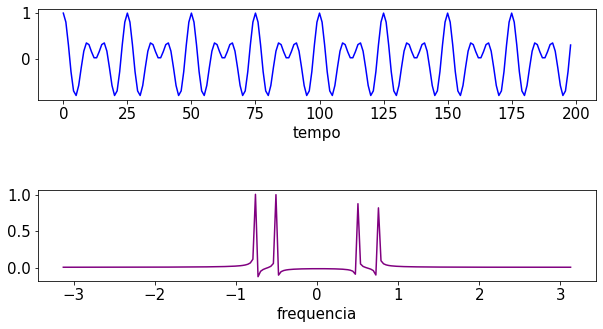

In [337]:
A_m = 1

f_m = 100

T = 4 / f_m #tempo do sinal gerado

t = arange(0, T - T_s, T_s)

am_dsb_sc(A_c,f_c,A_m,f_m,t)

Aqui temos o mesmo resultado obtido na modulação AM-DSB. Aumentar a frequência do sinal modulante tem o mesmo efeito de se reduzir a frequência da portadora.

## 3) Gerar um sinal AM-SSB (será preciso pesquisar como implementar uma transformada de Hilbert).
    
    a) Alterar a frequência de amostragem;
    
    b) Alterar a amplitude da portadora;
    
    c) Frequência da portadora;
    
    d) Amplitude do sinal modulante;
    
    e) Frequência do sinal modulante.
